In [78]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Lendo os dados

In [79]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [81]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Analisando os dados do DataSet Iris

In [82]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

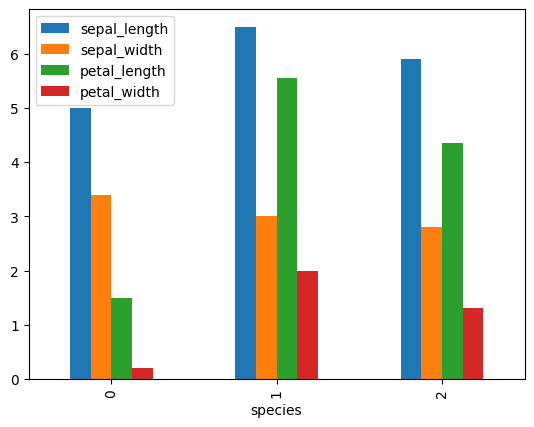

In [83]:
df.groupby('species').median().plot(kind='bar')

In [84]:
headers_list = df.columns.values.tolist()

In [85]:
cm = np.corrcoef(df[headers_list].values.T)

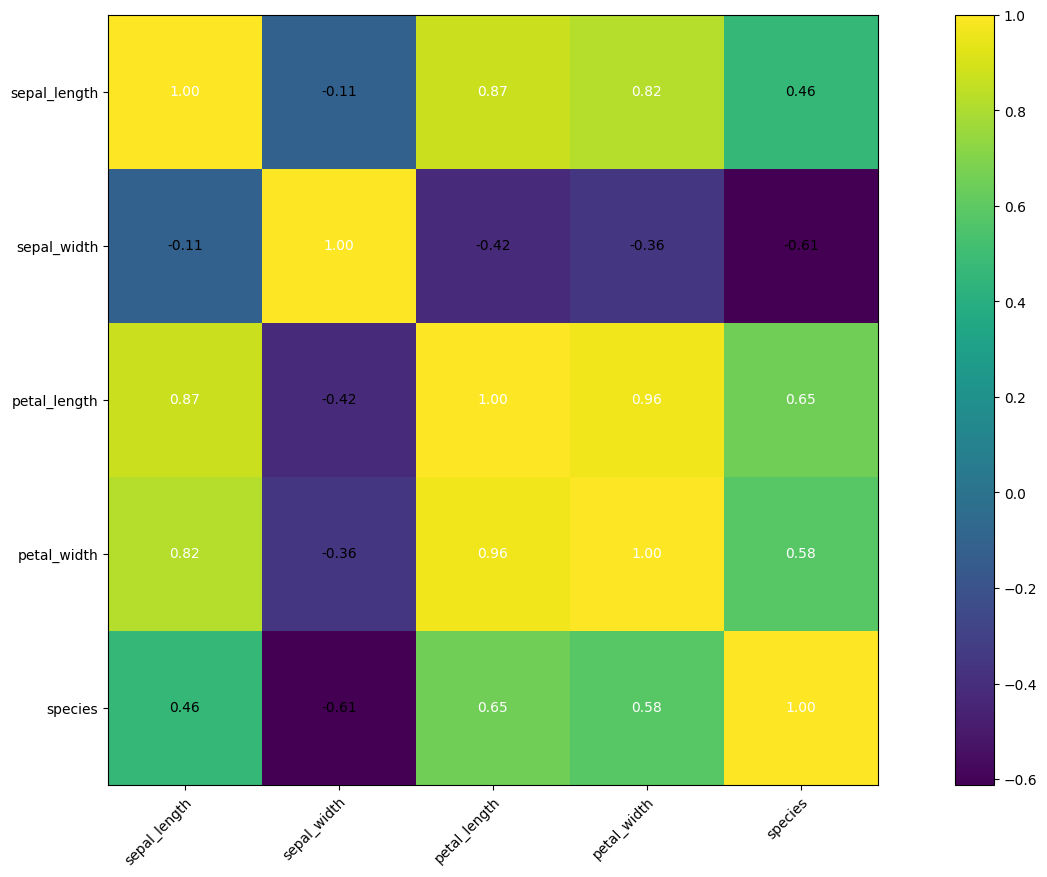

In [86]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [87]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [88]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [89]:
data.shape

(150, 5)

In [90]:
X = data[:,:-1]

y = data[:, -1]


In [91]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [92]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [94]:
X_train.shape

(112, 4)

In [95]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [96]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [97]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [98]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [99]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.Sigmoid()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

# Treino


--> Rascunho


In [100]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            print(model.L1)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            




Linear(in_features=4, out_features=32, bias=True)
0 loss= 1.0965973138809204
Linear(in_features=4, out_features=32, bias=True)
1 loss= 1.0962918996810913
Linear(in_features=4, out_features=32, bias=True)
2 loss= 1.096043348312378
Linear(in_features=4, out_features=32, bias=True)
3 loss= 1.0958253145217896
Linear(in_features=4, out_features=32, bias=True)
4 loss= 1.0956220626831055
Linear(in_features=4, out_features=32, bias=True)
5 loss= 1.0954288244247437
Linear(in_features=4, out_features=32, bias=True)
6 loss= 1.0952436923980713
Linear(in_features=4, out_features=32, bias=True)
7 loss= 1.0950653553009033
Linear(in_features=4, out_features=32, bias=True)
8 loss= 1.0948923826217651
Linear(in_features=4, out_features=32, bias=True)
9 loss= 1.0947223901748657
Linear(in_features=4, out_features=32, bias=True)
10 loss= 1.09455144405365
Linear(in_features=4, out_features=32, bias=True)
11 loss= 1.0943752527236938
Linear(in_features=4, out_features=32, bias=True)
12 loss= 1.0941886901855469

c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Linear(in_features=4, out_features=32, bias=True)
59 loss= 0.9613221287727356
Linear(in_features=4, out_features=32, bias=True)
60 loss= 0.9546883702278137
Linear(in_features=4, out_features=32, bias=True)
61 loss= 0.9481677412986755
Linear(in_features=4, out_features=32, bias=True)
62 loss= 0.9417964220046997
Linear(in_features=4, out_features=32, bias=True)
63 loss= 0.9356073141098022
Linear(in_features=4, out_features=32, bias=True)
64 loss= 0.9296284317970276
Linear(in_features=4, out_features=32, bias=True)
65 loss= 0.9238830804824829
Linear(in_features=4, out_features=32, bias=True)
66 loss= 0.9183891415596008
Linear(in_features=4, out_features=32, bias=True)
67 loss= 0.9131592512130737
Linear(in_features=4, out_features=32, bias=True)
68 loss= 0.9082010984420776
Linear(in_features=4, out_features=32, bias=True)
69 loss= 0.9035172462463379
Linear(in_features=4, out_features=32, bias=True)
70 loss= 0.8991064429283142
Linear(in_features=4, out_features=32, bias=True)
71 loss= 0.894

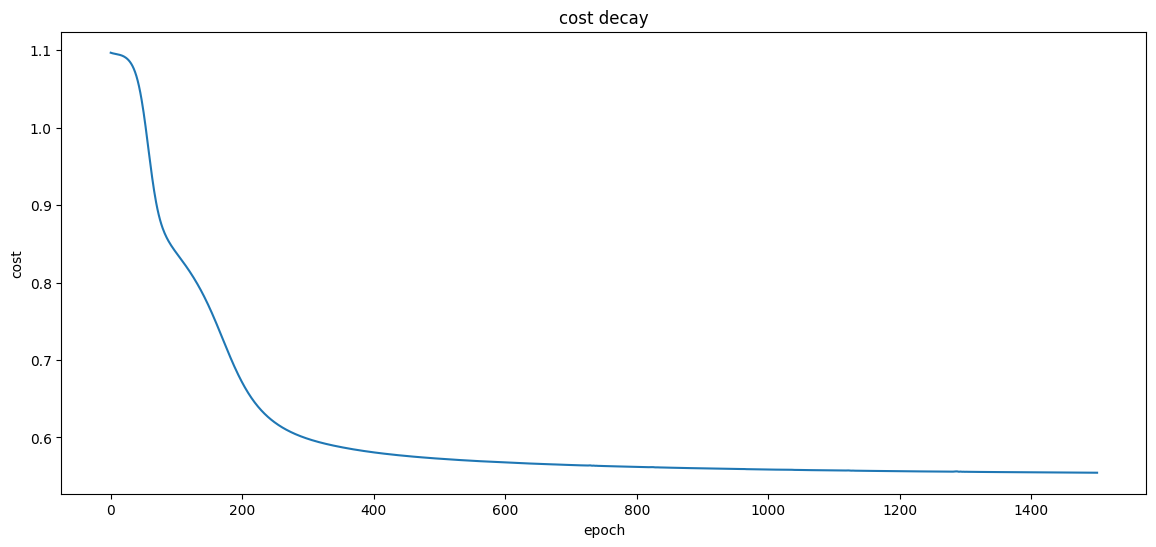

In [101]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training(  epochs, model , loss_fn, opt  )


# Avaliação do Modelo

In [102]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Fazendo Histograma dos valores de cada layer

In [103]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.3502,  0.2931, -0.3731,  0.0023],
        [ 0.1584, -0.0969, -0.3617,  0.4666],
        [-0.0148, -0.0123, -0.4607, -0.4018],
        [ 0.2301, -0.0250,  0.2384, -0.2637],
        [ 0.2571,  0.1996, -0.2759,  0.4323],
        [ 0.2871, -0.3948,  0.4460, -0.4752],
        [ 0.3198, -0.4211,  0.2133,  0.4980],
        [-0.3017,  0.4379, -0.1474,  0.3798],
        [-0.2500,  0.4842, -0.4625,  0.0314],
        [ 0.2289, -0.3898,  0.4681, -0.0160],
        [-0.1735,  0.1692,  0.4027,  0.1801],
        [-0.1395,  0.2486,  0.2579,  0.2152],
        [-0.2450, -0.1829, -0.3876,  0.3060],
        [-0.3362, -0.3026,  0.2895,  0.4231],
        [ 0.2516,  0.4670, -0.4937, -0.3814],
        [-0.3421,  0.3203, -0.0233, -0.4658],
        [-0.3618,  0.0530,  0.2645,  0.2364],
        [-0.2593, -0.3603,  0.2374,  0.4427],
        [ 0.3273, -0.3539,  0.0761, -0.4594],
        [-0.3967, -0.3831,  0.2581, -0.3772],
        [ 0.1257,  0.4757,  0.0148, -0.4799],
        [ 0.

In [104]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [105]:
MLP_Model().L1.weight[0][0]

tensor(0.0048, grad_fn=<SelectBackward0>)

In [107]:

# Vou ver somente de um neuronio, o 1o da layer 1

def training_alt( N_Epochs, model, loss_fn, opt  ):
    
    output_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            output = MLP_Model().L1.weight[0][0]
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            output_list.append(output.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("Value")
    plt.plot(output_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            



c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 loss= 1.0961917638778687
1 loss= 1.095979928970337
2 loss= 1.0957961082458496
3 loss= 1.0956366062164307
4 loss= 1.0954996347427368
5 loss= 1.095382571220398
6 loss= 1.0952814817428589
7 loss= 1.0951906442642212
8 loss= 1.095103144645691
9 loss= 1.0950114727020264
10 loss= 1.0949097871780396
11 loss= 1.0947935581207275
12 loss= 1.0946604013442993
13 loss= 1.0945087671279907
14 loss= 1.094338059425354
15 loss= 1.0941473245620728
16 loss= 1.0939356088638306
17 loss= 1.093700885772705
18 loss= 1.0934410095214844
19 loss= 1.0931531190872192
20 loss= 1.0928337574005127
21 loss= 1.092478632926941
22 loss= 1.092083215713501
23 loss= 1.0916424989700317
24 loss= 1.0911508798599243
25 loss= 1.0906022787094116
26 loss= 1.0899900197982788
27 loss= 1.089307427406311
28 loss= 1.088546872138977
29 loss= 1.087700605392456
30 loss= 1.08676016330719
31 loss= 1.0857168436050415
32 loss= 1.084560751914978
33 loss= 1.0832823514938354
34 loss= 1.0818711519241333
35 loss= 1.0803160667419434
36 loss= 1.0786

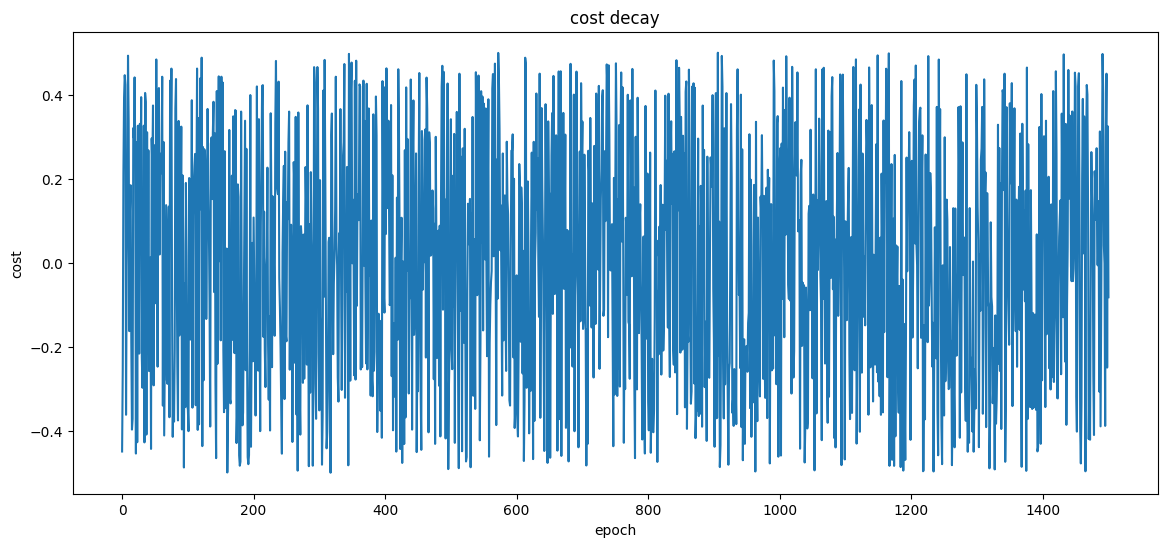

In [108]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training_alt(  epochs, model , loss_fn, opt  )